## Customer Cohort Analysis

- In this project. Cohort analysis will be performed on the OnlineRetail dataset.
- We will create customer retention,average sales,average quantity based on their cohort(group) and see clearly the pattern with the help of data visualization.

### Table of Contents

#### [1. Importing Libraries](#1)
#### [2. Explore the Dataset](#2)
#### [3. Cleaning Data](#3)
#### [4. Wrangling Data](#4)
#### [5. Creating Cohort](#5)
#### [6. Customer Retention Cohort Analysis](#6)
#### [7. Average Quantity Cohort Analysis](#7)
#### [8. Average Sales Cohort Analysis](#8)
#### [9. Conclusion](#9)

### 1. Importing Libraries <a id=1></a>

In [231]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### 2. Explore the Dataset <a id=2></a>

In [232]:
df = pd.read_csv('OnlineRetail.csv')

In [233]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [234]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [235]:
df.shape

(541909, 8)

### 3. Cleaning Data <a id=3></a>

In [236]:
round(df.isnull().sum()/len(df),2)

InvoiceNo      0.00
StockCode      0.00
Description    0.00
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.25
Country        0.00
dtype: float64

In [237]:
### We see that CustomerId has 25% missing data 

In [238]:
df = df.dropna(subset=['CustomerID'])

In [239]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Duplicated Values

In [240]:
df[df.duplicated(keep='first')].head() # Checking duplicated values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [241]:
df.drop_duplicates(inplace=True)

In [242]:
df[df.duplicated(keep='first')] ## Now we dropped duplicated values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [243]:
## We see that there are some negative Quantity values in the dataset. We will remove them.
df = df[df['Quantity']>0]

In [244]:
df.shape

(392732, 8)

### 4. Wrangling Data <a id=4></a>

In [245]:
cleaned_data = df.copy()

In [246]:
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

In [247]:
def get_month(x): ## Built a function to create a new column inludes only month and year
    return dt.datetime(x.year, x.month, 1) #year, month, incremints of day

In [248]:
cleaned_data['InvoiceMonth'] = cleaned_data['InvoiceDate'].apply(get_month)

In [249]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [250]:
#Create a CohortMonth column by grouping data and selecting the earliest instance in the data.
cleaned_data['CohortMonth'] = cleaned_data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [252]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


### 5. Creating Cohort <a id=5></a>

In [253]:
#When passed a datetime column this functions splits out year, month, day

def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [254]:
#splits invoiced month and data into single variables
invoice_year, invoice_month, _ = get_date(cleaned_data, 'InvoiceMonth') 

In [255]:
#Inspect the variable
invoice_month[:10] #[:30] selects the first 30 rows of data

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: InvoiceMonth, dtype: int64

In [256]:
#splits cohort month and data into single variables
cohort_year, cohort_month, _ = get_date(cleaned_data, 'CohortMonth')

In [257]:
cohort_month[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: CohortMonth, dtype: int64

In [258]:
# Creating a variable which holds the differnce between the invoice and cohort year 
year_diff = invoice_year - cohort_year

In [259]:
month_diff = invoice_month - cohort_month

In [260]:
cleaned_data['CohortIndex'] = year_diff * 12 + month_diff + 1

In [261]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [262]:
cleaned_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


### 6. Creating Customer Retention Cohort Table <a id=6></a>

In [266]:
#Group the data by columns CohortMonth','CohortIndex' then aggreate by column 'CustomerID'
cohort_data = cleaned_data.groupby(
    ['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [267]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')

In [268]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Created month cohort to see customer retention number

### Customer Retention as a percentage

In [189]:
cohort_size = cohort_count.iloc[:,0] #select all the rows : select the first column
retention = cohort_count.divide(cohort_size, axis=0) #Divide the cohort by the first column
retention.round(3) # round the retention to 3 places

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02-01,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03-01,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating cohort heatmaps

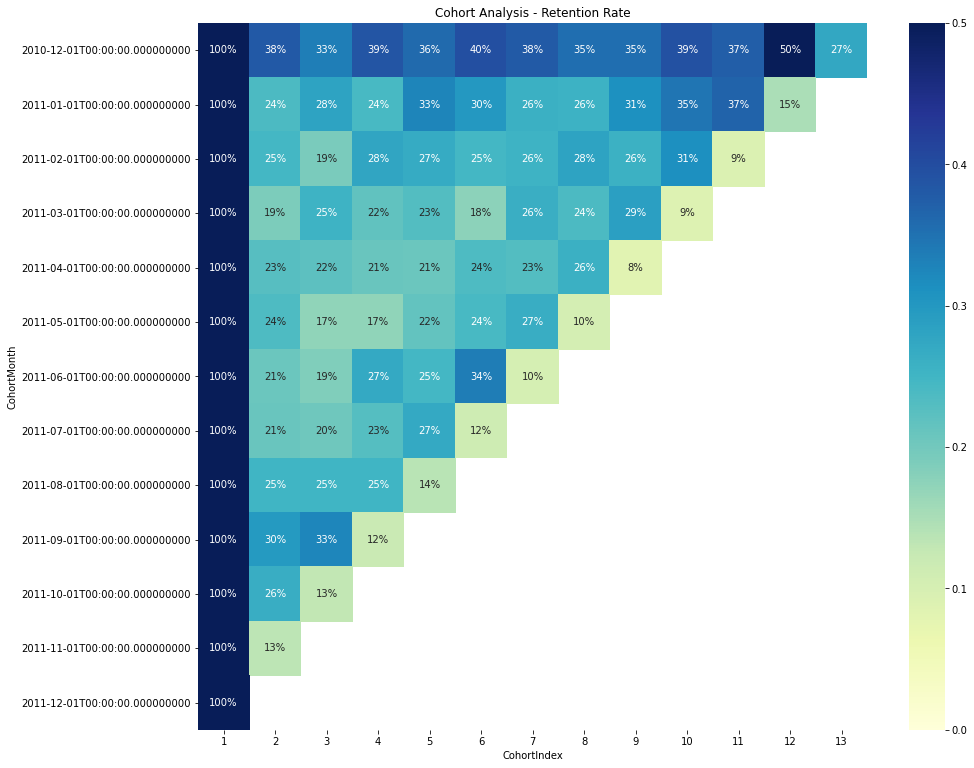

In [269]:
plt.figure(figsize = (15,13))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

##### As the table above : We can see that 38 % of customer who purchased their first item on December,2010, purchased again on January,2011

### 7 Average Quantity Sold <a id=7></a>

In [270]:
cohort_data2 = cleaned_data.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.3,17.7,19.0,13.6,15.4
2011-01-01,17.5,13.5,12.7,15.3,12.9,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02-01,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03-01,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05-01,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


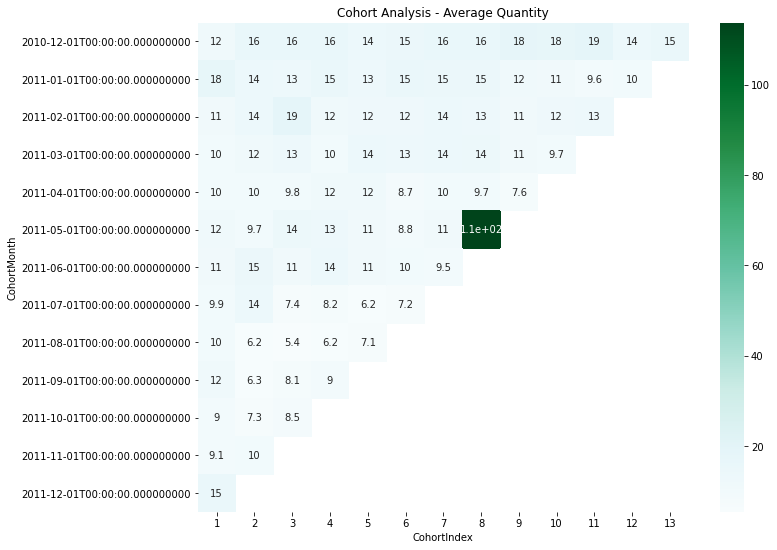

In [271]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

### 8. Average sales<a id=8></a>

In [272]:
#Create a new column for Total Sales 
cleaned_data['TotalSale'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

In [273]:
cohort_data3 = cleaned_data.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round(1)
average_sales

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.2,27.3,26.9,27.2,21.2,28.1,28.3,27.4,29.2,33.5,34.0,23.6,25.8
2011-01-01,26.9,25.1,21.0,31.2,22.5,26.3,25.2,25.5,19.1,22.3,19.7,19.8,NaN
2011-02-01,17.9,20.8,21.4,19.4,17.7,17.0,22.2,22.9,18.8,22.2,23.5,NaN,NaN
2011-03-01,17.6,21.1,22.7,18.0,21.1,19.0,22.0,20.0,16.8,13.2,NaN,NaN,NaN
2011-04-01,17.0,21.0,19.5,18.7,19.5,15.0,15.3,16.0,12.3,NaN,NaN,NaN,NaN
2011-05-01,20.5,17.3,22.2,20.9,18.6,14.1,17.0,234.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.0,16.3,19.9,20.4,15.3,16.7,13.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,15.0,23.5,11.8,13.0,10.9,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.5,13.2,12.5,15.9,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


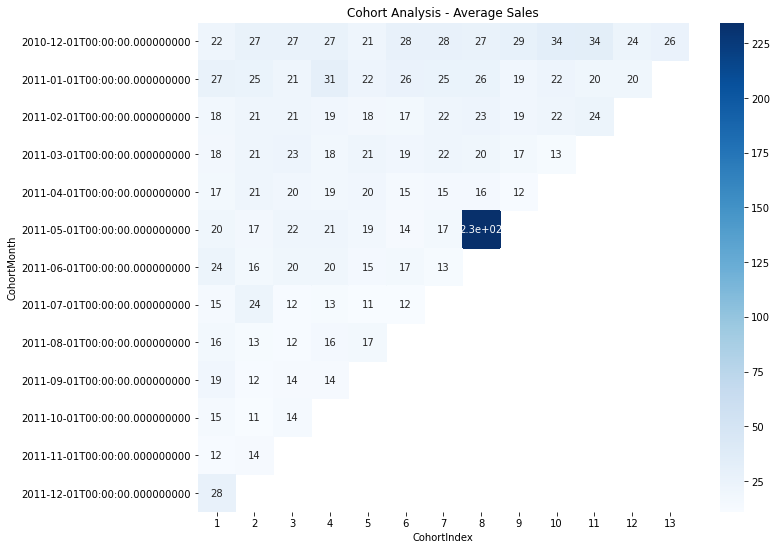

In [274]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "Blues")
plt.show()

### 9. Conclusion<a id=9></a>

Cohort analysis is so useful for the company who consider to measure Customer Retention Rate,Customer Life Time Value and Quantity sold from given period.

Before we perform the analysis 


- Determine what question you want to answer. 

- Define the metrics that will be able to help you answer the question.

- Define the specific cohorts that are relevant.

- Perform the cohort analysis


#### Thank you